# Data Engineering
`Donwloading and creating the dataset for the LyricsGenerator task.`

**Project Repository:** https://github.com/Tr33Bug/ML-NLP-LyricsGen-Transformer

Ressources:
- https://ruder.io/recent-advances-lm-fine-tuning/
- https://towardsdatascience.com/how-to-fine-tune-gpt-2-for-text-generation-ae2ea53bc272
- http://jalammar.github.io/illustrated-gpt2/

## Notebook Setup


In [40]:
# installation: 
! pip install lyricsgenius
! pip install pandas
! pip install regex
! pip install matplotlib

In [41]:
# imports and setup
import lyricsgenius
import os
import pandas as pd
import regex as re
import matplotlib.pyplot as plt

In [42]:
#### FILE PATHS
# root path
root = './'

# dataset from spotify list (deprecated)
geniusDataset = root + 'datasets/genius/'
geniusCleanDataset = root + 'datasets/geniusClean/'

# dataset from IMDP Top 100 Rap Artists
geniusTopRapIMDB = root + 'datasets/geniusTopRapIMDB/'
geniusTopRapIMDBClean = root + 'datasets/geniusTopRapIMDBClean/'

# dataset from IMDP top 100 artists all time and top 21th century artists
geniusTopIMDB = root + 'datasets/geniusTopIMDB/'
geniusTopIMDBClean = root + 'datasets/geniusTopIMDBClean/'

# API token path
tokenPath = root + 'geniusToken.txt'


## Setup API-Connection

Using: 
- the Genius API from genius.com (https://docs.genius.com/#/getting-started-h1)
- the LyricsGenius-Framework (https://github.com/johnwmillr/LyricsGenius)
---

In [43]:
# Genius API Access Token
# get token at: https://genius.com/api-clients
# load token from file
with open(tokenPath, 'r') as file:
    GENIUS_ACCESS_TOKEN = str(file.read())

    # delete last newline character from token
    # GENIUS_ACCESS_TOKEN = GENIUS_ACCESS_TOKEN[:-1]
    file.close()

In [44]:
# test connection'
genius = lyricsgenius.Genius(GENIUS_ACCESS_TOKEN)

# remove headers like [Intro], [Chorus], [Verse 1], etc.
genius.remove_section_headers = True

In [45]:
# function to save every song to one file
def writeSongToFile(artist):
    for song in artist.songs:
        # save song in a file called artistname-songname.txt
        song.save_lyrics(filename='Lyrics_' + song.artist + '_' + song.title, extension='txt', verbose=True)


In [46]:
# function to move all files starting with 'Lyrics_' to path
def moveLyricsFiles(fromPath, toPath):
    for filename in os.listdir(fromPath):
        if filename.startswith('Lyrics_'):
            if not os.path.exists(toPath + filename):
                os.rename(filename, toPath + filename)


### Test API-Connetction

In [9]:
# test connection with Colplay as example
artist = genius.search_artist("Coldplay", max_songs=2, sort="popularity")
print(artist.songs)

Searching for songs by Coldplay...

Song 1: "Viva la Vida"


Timeout: Request timed out:
HTTPSConnectionPool(host='genius.com', port=443): Read timed out. (read timeout=5)

In [19]:
# print lyrics of first song from example
print(artist.songs[0].lyrics)

Translationsहिन्दीTürkçeEspañolPortuguêsDeutschFrançaisViva la Vida Lyrics[Verse 1: Chris Martin]
I used to rule the world
Seas would rise when I gave the word
Now in the morning, I sleep alone
Sweep the streets I used to own

[Interlude]

[Verse 2: Chris Martin]
I used to roll the dice
Feel the fear in my enemies' eyes
Listen as the crowd would sing
"Now the old king is dead, long live the king"
One minute, I held the key
Next, the walls were closed on me
And I discovered that my castles stand
Upon pillars of salt and pillars of sand
[Chorus: Chris Martin]
I hear Jerusalem bells a-ringin'
Roman cavalry choirs are singin'
Be my mirror, my sword and shield
My missionaries in a foreign field
For some reason I can't explain
Once you'd gone, there was never
Never an honest word
And that was when I ruled the world

[Interlude]

[Verse 3: Chris Martin]
It was the wicked and wild wind
Blew down the doors to let me in
Shattered windows and the sound of drums
People couldn't believe what I'd be

In [20]:
# test writing lyrics to file function for example
#writeSongToFile(artist)

In [21]:
# test moving lyrics files to dataset folder for example
#moveLyricsFiles(root, geniusDataset)

## Create Artist Lists

Ressources:
- Top 49 20th Century: https://www.imdb.com/list/ls058480497/
- Top 100 AllTime: https://www.imdb.com/list/ls064818015/
- Top Rapper: https://www.imdb.com/list/ls054191097/
- Spotify Dataset: https://www.kaggle.com/datasets/sashankpillai/spotify-top-200-charts-20202021 **(deprected)**
---

In [47]:
# load csv to dataframe
# df = pd.read_csv(root + 'datasets/spotify_dataset.csv')

# list of top musicians from IMDB
df_top49 = pd.read_csv(root + 'datasets/Top100GreatestMusicArtistsofAll-TimeIMDB.csv')
df_top20s = pd.read_csv(root + 'datasets/Top100GreatestMusiciansSincethe20thCenturyIMDB.csv')
df_topRap = pd.read_csv(root + 'datasets/Top100rappersIMDB.csv')

# create list of all dataframes
df_list = [df_top49, df_top20s, df_topRap]

In [48]:

for df in df_list:
    # sort all dataframe by Name
    df.sort_values(by=['Name'], inplace=True, ascending=True)

    # remove all rows except for the Name
    df.drop(df.columns.difference(['Name']), 1, inplace=True)

    # print len of dataframes
    print(len(df))

49
100
100


/var/folders/6s/slt28qxd6zg11_5c2pz6clj40000gn/T/ipykernel_94409/3590710727.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(df.columns.difference(['Name']), 1, inplace=True)


In [49]:
df_top20s.head()

,Name
62,AC/DC
54,Aerosmith
36,Alice Cooper
97,Amy Winehouse
79,Anthrax


In [50]:
df_top49.head()

,Name
22,AC/DC
25,Aretha Franklin
47,Beyoncé
6,Bob Dylan
9,Bob Marley


In [51]:
df_topRap.head()

,Name
31,50 Cent
39,AZ
10,André 3000
54,Anthony 'Treach' Criss
46,Beanie Sigel


In [52]:
#### MERGE TOP 49 AND TOP 20s INTO ONE DATAFRAME topArtists
# get all Names from df_top49 and df_top20s in a list
names_top49 = df_top49['Name'].tolist()
names_top20s = df_top20s['Name'].tolist()

# merge both lists
topArtistsList = names_top49 + names_top20s
topRapper = df_topRap['Name'].tolist()

# remove duplicates
topArtistsList = list(dict.fromkeys(topArtistsList))

# print(topArtistsList)
# print(len(topArtistsList))

In [53]:

#### GENEREATE TOP 100 RAPPER LIST
# delete all entries from topRapper that are also in topArtistsList
topRapper = [x for x in topRapper if x not in topArtistsList]

# sort list
topRapper.sort()

# generate topRapper list
topRapper = list(filter(None, topRapper))

# remove whitespaces from start and end of strings
topRapper = [x.strip() for x in topRapper]

# print(topRapper)
print(len(topRapper))

93


In [54]:
# print total number of Artists 
print('Total number of Artists is:', len(topArtistsList) + len(topRapper))

Total number of Artists is: 201


## Generate Dataset

using:
- top 100 Artists from streaming numbers extracted from:
    - https://www.kaggle.com/datasets/sashankpillai/spotify-top-200-charts-20202021
- getting 20 songs from every artist
    - getting it from genius.com with lyricsgenius
        - https://github.com/johnwmillr/LyricsGenius
    - sortet after popularity
- writing a txt file for every artist and saving it to 'datasets/genius/'
---

In [23]:
# constants
NUM_SONGS = 50
LIST_TO_USE = 'Rap' # 'Top' or 'Rap'

In [24]:
# lists to get songs from
print(len(topArtistsList))
print(len(topRapper))

108
93


In [25]:
# define list to use with genius api
if LIST_TO_USE == 'Top':
    artistList = topArtistsList
elif LIST_TO_USE == 'Rap':
    artistList = topRapper
else:
    print('Error: LIST_TO_USE not set correctly')

print('Current list:', LIST_TO_USE, '\nLen:', len(artistList))




Current list: Rap 
Len: 93


In [26]:
# sort list alphabetically
artistList.sort()

# write top artists to file
with open(root + 'datasets/topArtists.txt', 'w') as f:
    for item in artistList:
        f.write("%s\n" % item)

# insert new line for every ',' in file topArtists.txt
with open(root + 'datasets/topArtists.txt', 'r') as f:
    lines = f.readlines()
    for i in range(len(lines)):
        lines[i] = lines[i].replace(',', '\n')
    with open(root + 'datasets/topArtists.txt', 'w') as f:
        f.writelines(lines)
f.close()



In [27]:
# read top artists from file
with open(root + 'datasets/topArtists.txt', 'r') as f:
    artistList = f.read().split('\n')

# remove empty strings from list
artistList = list(filter(None, artistList))

# remove whitespaces from start and end of strings
artistList = [x.strip() for x in artistList]

# remove duplicates
artistList = list(dict.fromkeys(artistList))


# print every artist from list 
#for artist in artistList:
#    print(artist)
    
print(len(artistList))



93


In [59]:
import time

# get lyrics for top artists
artistFile = []
for person in artistList:
    print(person)
    for i in range(10):
        try:
            artistFile = genius.search_artist(person, max_songs=NUM_SONGS, sort="popularity")
            # artistFile.save_lyrics(extension='txt', verbose=True)
            # if songs found, write to file
            if artistFile.songs:
                writeSongToFile(artistFile)
            else:
                print('No songs found for ' + person)
            break
        except:
            time.sleep(2)
            print('Error with:', person,'Got:', artistFile)

Lil Wayne
Searching for songs by Lil Wayne...

Error with: Lil Wayne Got: []
Searching for songs by Lil Wayne...

Song 1: "Love Me"
Song 2: "Mona Lisa"
Song 3: "Believe Me"
Song 4: "6 Foot 7 Foot"
Error with: Lil Wayne Got: []
Searching for songs by Lil Wayne...

Song 1: "Love Me"
Song 2: "Mona Lisa"
Song 3: "Believe Me"
Song 4: "6 Foot 7 Foot"


In [28]:
# define dataset path depending on list used
if LIST_TO_USE == 'Top':
    datasetPath = geniusTopIMDB
elif LIST_TO_USE == 'Rap':
    datasetPath = geniusTopRapIMDB
else:
    print('Error: LIST_TO_USE not set correctly')

# move lyrics files to geniusDataset
moveLyricsFiles(root, datasetPath)

In [29]:
# get number of files in geniusDataset
print('GeniusTopRap:', len(os.listdir(geniusTopRapIMDB)))
print('GeniusTop:',len(os.listdir(geniusTopIMDB)))

print('Genius:', len(os.listdir(geniusDataset)))
print('GeniusClean:', len(os.listdir(geniusCleanDataset)))



GeniusTopRap: 2750
GeniusTop: 4701


FileNotFoundError: [Errno 2] No such file or directory: './datasets/genius/'

## Cleaning Dataset

what to delete:
- all non englisch artists
- `워`
- `Translations`... to `\n`
- all non english characters
- `()` --> Replace with whitespace
- all between `[]`
- number+`Embed`... to `\n`
- `like2Embed` to `\n`

--> delete all non english files manual

In [30]:
# define dataset paths
geniusTopIMDBClean = root + 'datasets/geniusTopIMDBClean/'
geniusTopRapIMDBClean = root + 'datasets/geniusTopRapIMDBClean/'
geniusCleanDataset = root + 'datasets/geniusClean/'

In [31]:
# clean lyrics files
def cleanFiles(path):
    for filename in os.listdir(path):
        if filename.endswith('.txt'):
            with open(path + filename, 'r') as f:
                text = f.read()
                # insert new line at end of text
                text = text + '\n'
                text = text.replace('워', '')
                text = text.replace('(', ' ')
                text = text.replace(')', ' ')
                # delete all between []
                text = re.sub(r'\[.*?\]', '', text)
                # delete all number + 'Embed' to \n
                text = re.sub(r'\d*Embed.*?\n', '', text)
                # delete all from 'Translations' to \n
                text = re.sub(r'Translations*?\n', '', text)
                # delete all chinese characters
                text = re.sub(r'[\u4e00-\u9fff]+', '', text)
                # delete all non english characters
                text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
                # delete all empty lines except the last in the file
                text = re.sub(r'(?m)^\s*?\n', '', text)
                # delete all whitespace in front of a line
                text = re.sub(r'(?m)^\s+', '', text)

                # get songname from filename
                try:
                    songname = filename.split('_')[2]
                except:
                    songname = filename


                # delete .txt from songname
                songname = songname.replace('.txt', '')
                
                
                # delete songtext + Lyrics from textfile
                text = text.replace(songname + ' Lyrics', '')

            
                text = text.replace('You might also likeEmbed', '')
                text = text.replace('Embed\n', '\n')
                text = text.replace('You might also like', '\n')

            with open(path + filename, 'w') as f:
                f.write(text)
            
    print('✅ --> Cleaning', path, 'done!')


In [38]:
# run function to clean files on clean folders
cleanFiles(geniusTopIMDBClean)
cleanFiles(geniusTopRapIMDBClean)
cleanFiles(geniusCleanDataset)

UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 201: character maps to <undefined>

## Explore datasets


Creating dataframe from folders and exploring them

--- 

### Load datasets from file

In [55]:
def createDfFromFiles(path):

    # delete '.' from path, if path is relative with '.' in beginning
    if path.startswith('./'):
        path = path[1:]
    

    # make the path from current directory and the input path
    pathComp = os.getcwd() + path

    # create a tuple from files in path dataset with the file name and the file content, with latin-1 encoding
    files = [(file, open(pathComp + file, 'r', encoding='latin-1').read()) for file in os.listdir(pathComp)]

    # delete all .txt from filename
    files = [(file.replace('.txt', ''), content) for file, content in files]

    # delete all Lyrics_ from filename
    files = [(file.replace('Lyrics_', ''), content) for file, content in files]

    # replace all \n with space
    files = [(file, content.replace('\n', ' ')) for file, content in files]

    # replace all double spaces with single space
    files = [(file, content.replace('  ', ' ')) for file, content in files]

    # delete all spaces at the beginning of the string
    files = [(file, content.lstrip()) for file, content in files]

    # create a dataframe from the tuple
    df = pd.DataFrame(files, columns=['Artist', 'Lyrics'])

    # split artist name into artist and song devided by _
    df[['Artist', 'Song']] = df.Artist.str.split("_", expand=True)

    # rearrange colums to artist, song, lyrics
    df = df[['Artist', 'Song', 'Lyrics']]
    

    print('✅ --> Creating dataframe from', path, 'done!')
    return df

In [56]:
df_top = createDfFromFiles(geniusTopIMDBClean)
df_top.head()

✅ --> Creating dataframe from /datasets/geniusTopIMDBClean/ done!


,Artist,Song,Lyrics
0,Megadeth,À Tout le Monde,Tout le Monde Lyrics Dont remember where I was...
1,Eurythmics,Sex Crime 1984,Sex Crime 1984 LyricsSex sex sex Sex sex sex S...
2,U2,Mysterious Ways,Johnny take a walk with your sister the moon L...
3,Juelz Santana,Time Ticking,We just getting to the money why they hating T...
4,Black Sabbath,Children of the Grave,Revolution in their minds The children start t...


In [57]:
df_rap = createDfFromFiles(geniusTopRapIMDBClean)
df_rap.head()

✅ --> Creating dataframe from /datasets/geniusTopRapIMDBClean/ done!


,Artist,Song,Lyrics
0,Rick Ross,Sorry,MayMayMay What is this MayMayMay Maybach Music...
1,50 Cent,Ill Still Kill,Oh dont even look at me wrong when I come thro...
2,Snoop Dogg,Thats That Shit,Yeah thats right I like that The royal penis i...
3,Iggy Azalea,The Last Song,Can I help you You wanna buy some ignorant art...
4,Killer Mike,JoJos Chillin,This album was created entirely by Jaime and M...


### Describe datasets

In [58]:
df_top.describe()

,Artist,Song,Lyrics
count,4701,4701,4701
unique,95,4511,4672
top,Megadeth,Heaven,
freq,50,5,29


In [59]:
df_rap.describe()

,Artist,Song,Lyrics
count,3785,3785,3785
unique,80,3645,3784
top,Rick Ross,Intro,
freq,50,9,2


### Explore datasets

In [60]:
# check for empty entries in dataframes
print('df_top:', df_top.isnull().values.any())
print('df_rap:', df_rap.isnull().values.any())

df_top: False
df_rap: False


In [61]:
# print number of artists in top and rap
print('df_top:', len(df_top['Artist'].unique()))
print('df_rap:', len(df_rap['Artist'].unique()))
print('total:', len(df_top['Artist'].unique()) + len(df_rap['Artist'].unique()))


df_top: 95
df_rap: 80
total: 175


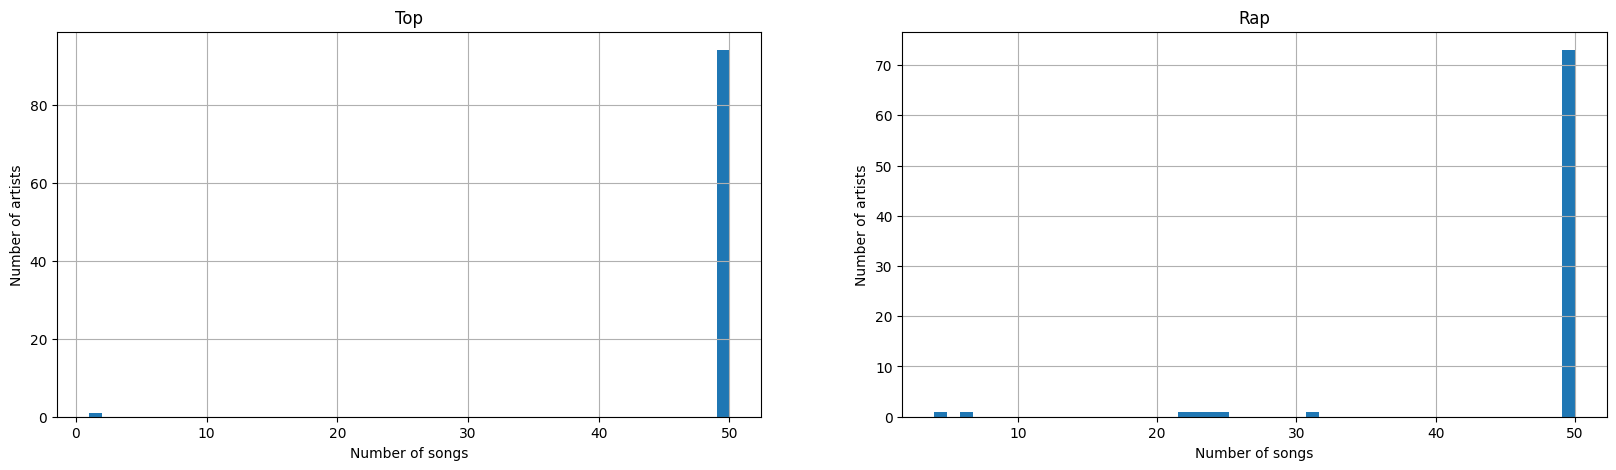

In [62]:
# plot number of songs per artists and name where artist has less than 50 songs for df_top and df_rap in a subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
df_top.groupby('Artist').count()['Song'].hist(bins=50, ax=ax1)
ax1.set_title('Top')
ax1.set_xlabel('Number of songs')
ax1.set_ylabel('Number of artists')
df_rap.groupby('Artist').count()['Song'].hist(bins=50, ax=ax2)
ax2.set_title('Rap')
ax2.set_xlabel('Number of songs')
ax2.set_ylabel('Number of artists')
plt.show()

In [63]:
# print names of artists with less than 50 songs
less50 = []
# for each artist in df_top append artist name and number of songs to less50 if number of songs is less than 50
for artist in df_top['Artist'].unique():
    if len(df_top[df_top['Artist'] == artist]) < 50:
        less50.append((artist, len(df_top[df_top['Artist'] == artist])))

for artist in df_rap['Artist'].unique():
    if len(df_rap[df_rap['Artist'] == artist]) < 50:
        less50.append((artist, len(df_rap[df_rap['Artist'] == artist])))

print(len(less50))

# print less50 artists with number of songs
for artist, songs in less50:
    print(artist, 'has', songs, 'songs')

8
ParliamentFunkadelic has 1 songs
Chuck D has 25 songs
André 3000 has 23 songs
Stack Bundles has 24 songs
Luke has 31 songs
Zack de la Rocha has 4 songs
Donald Glover has 22 songs
Treach has 6 songs


In [64]:
# drop artists from less 50 from df_top and df_rap
for artist, songs in less50:
    df_top = df_top[df_top['Artist'] != artist]
    df_rap = df_rap[df_rap['Artist'] != artist]


# print number of artists in top and rap
print('df_top:', len(df_top['Artist'].unique()))
print('df_rap:', len(df_rap['Artist'].unique()))

df_top: 94
df_rap: 73


### Merge datasets

In [65]:
# merge datasets
df_songs = pd.concat([df_top, df_rap], ignore_index=True)
df_songs.head()

,Artist,Song,Lyrics
0,Megadeth,À Tout le Monde,Tout le Monde Lyrics Dont remember where I was...
1,Eurythmics,Sex Crime 1984,Sex Crime 1984 LyricsSex sex sex Sex sex sex S...
2,U2,Mysterious Ways,Johnny take a walk with your sister the moon L...
3,Juelz Santana,Time Ticking,We just getting to the money why they hating T...
4,Black Sabbath,Children of the Grave,Revolution in their minds The children start t...


In [66]:
# check for empty entries in dataframes
print('df_top:', df_top.isnull().values.any())
print('df_rap:', df_rap.isnull().values.any())

df_top: False
df_rap: False


### Drop short songs

In [67]:
# print min and max of words per song
print('min:', df_songs['Lyrics'].str.split().str.len().min())
print('max:', df_songs['Lyrics'].str.split().str.len().max())

min: 0
max: 9802


In [68]:
# print artist and song name where lyrics are empty
for index, row in df_songs.iterrows():
    if row['Lyrics'] == '':
        print('artist:', row['Artist'],'song:', row['Song'], 'is empty!')

        # drop artist and song from df_songs
        df_songs = df_songs.drop(index)

        

artist: Bo Diddley song: The Clock Strikes Twelve is empty!
artist: Metallica song: Orion is empty!
artist: Led Zeppelin song: Moby Dick is empty!
artist: Daft Punk song: Aerodynamic is empty!
artist: Daft Punk song: Da Funk is empty!
artist: Black Sabbath song: Rat Salad is empty!
artist: The Police song: Synchronicity Album Cover Artwork is empty!
artist: The Beach Boys song: Lets Go Away for a While is empty!
artist: Daft Punk song: Veridis Quo is empty!
artist: Pink Floyd song: Any Colour You Like is empty!
artist: The Police song: Masoko Tanga is empty!
artist: Daft Punk song: High Life is empty!
artist: Eurythmics song: Ministry of Love is empty!
artist: Daft Punk song: Voyager is empty!
artist: Kraftwerk song: Dentaku is empty!
artist: Van Halen song: 1984 is empty!
artist: Daft Punk song: Interstella 5555 The 5tory of the 5ecret 5tar 5ystem is empty!
artist: Daft Punk song: Motherboard is empty!
artist: Janis Joplin song: Buried Alive In the Blues is empty!
artist: Daft Punk so

In [69]:
# append lyrics word count to df_songs
df_songs['LyricsWordCount'] = df_songs['Lyrics'].str.split().str.len()

# sort df_songs by lyrics word count
df_songs = df_songs.sort_values(by=['LyricsWordCount'], ascending=True)

df_songs.head()

,Artist,Song,Lyrics,LyricsWordCount
6431,Big Pun,Intermission Capital Punishment,Intermission Capital Punishment Lyrics,4
4084,Kraftwerk,Metropolis,Metropolis Metropolis Metropolis Metropolis Me...,6
586,Kraftwerk,Spacelab,Spacelab Spacelab Spacelab Spacelab Spacelab S...,6
4707,Gift of Gab,Intro Finding Inspiration Somehow,Intro Finding Inspiration Somehow LyricsFindin...,7
3252,Def Leppard,Switch 625,Ahh ahh ahh Ahh ahh ahh Ahh ahh ahh,9


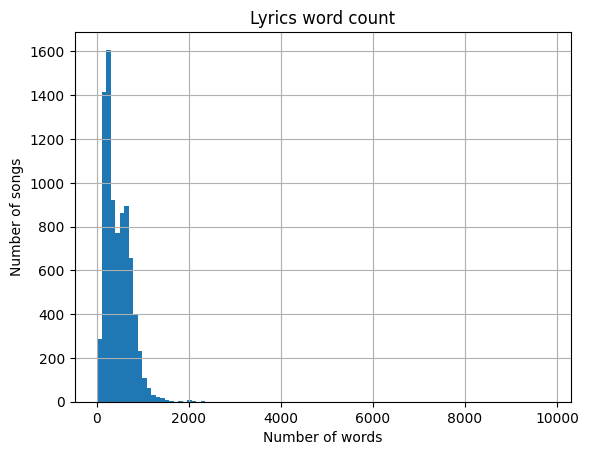

In [70]:
# plot histogram of lyrics word count
df_songs['LyricsWordCount'].hist(bins=100)
plt.title('Lyrics word count')
plt.xlabel('Number of words')
plt.ylabel('Number of songs')
plt.show()


In [71]:
# show artists of songs with less than 100 words
for index, row in df_songs.iterrows():
    if row['LyricsWordCount'] < 100:
        print(row['Artist'], row['Song'])
        

Big Pun Intermission Capital Punishment
Kraftwerk Metropolis
Kraftwerk Spacelab
Gift of Gab Intro Finding Inspiration Somehow
Def Leppard Switch 625
Kraftwerk Its More Fun to Compute
Kraftwerk Radioactivity Japanese Version  Houshanou
Pink Floyd One of These Days
Eurythmics Monkey Monkey
Megadeth Conquer or Die
Daft Punk Revolution 909
Kraftwerk Neon Lights
Kraftwerk Boing Boom Tschak
Kraftwerk Computer World 2
Black Sabbath Sleeping Village
The Who Its a Boy
Simon  Garfunkel Benedictus
Anthrax Intro to Reality
The Who Overture
Mae Rap Rushmore
Pink Floyd Goodbye Cruel World
The Beach Boys Pet Sounds
Daft Punk WDPK 83.7 FM
The Who I Am the Sea
Queen AyOh Live Aid
Kraftwerk The ManMachine
Jimi Hendrix Drifting
Pink Floyd On the Run
Simon  Garfunkel Bookends
Metallica To Live Is to Die
Kraftwerk Neonlicht
Kraftwerk Electric Café
Radiohead The National Anthem
Simon  Garfunkel Bookends Theme Reprise
B.B. King Nobody Loves Me But My Mother
Kraftwerk Home Computer
Hank Williams Ill Fly Away


/var/folders/6s/slt28qxd6zg11_5c2pz6clj40000gn/T/ipykernel_94409/4089750708.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_songs.groupby('Artist').mean()['LyricsWordCount'].sort_values(ascending=True).plot(kind='barh', figsize=(20, 20))


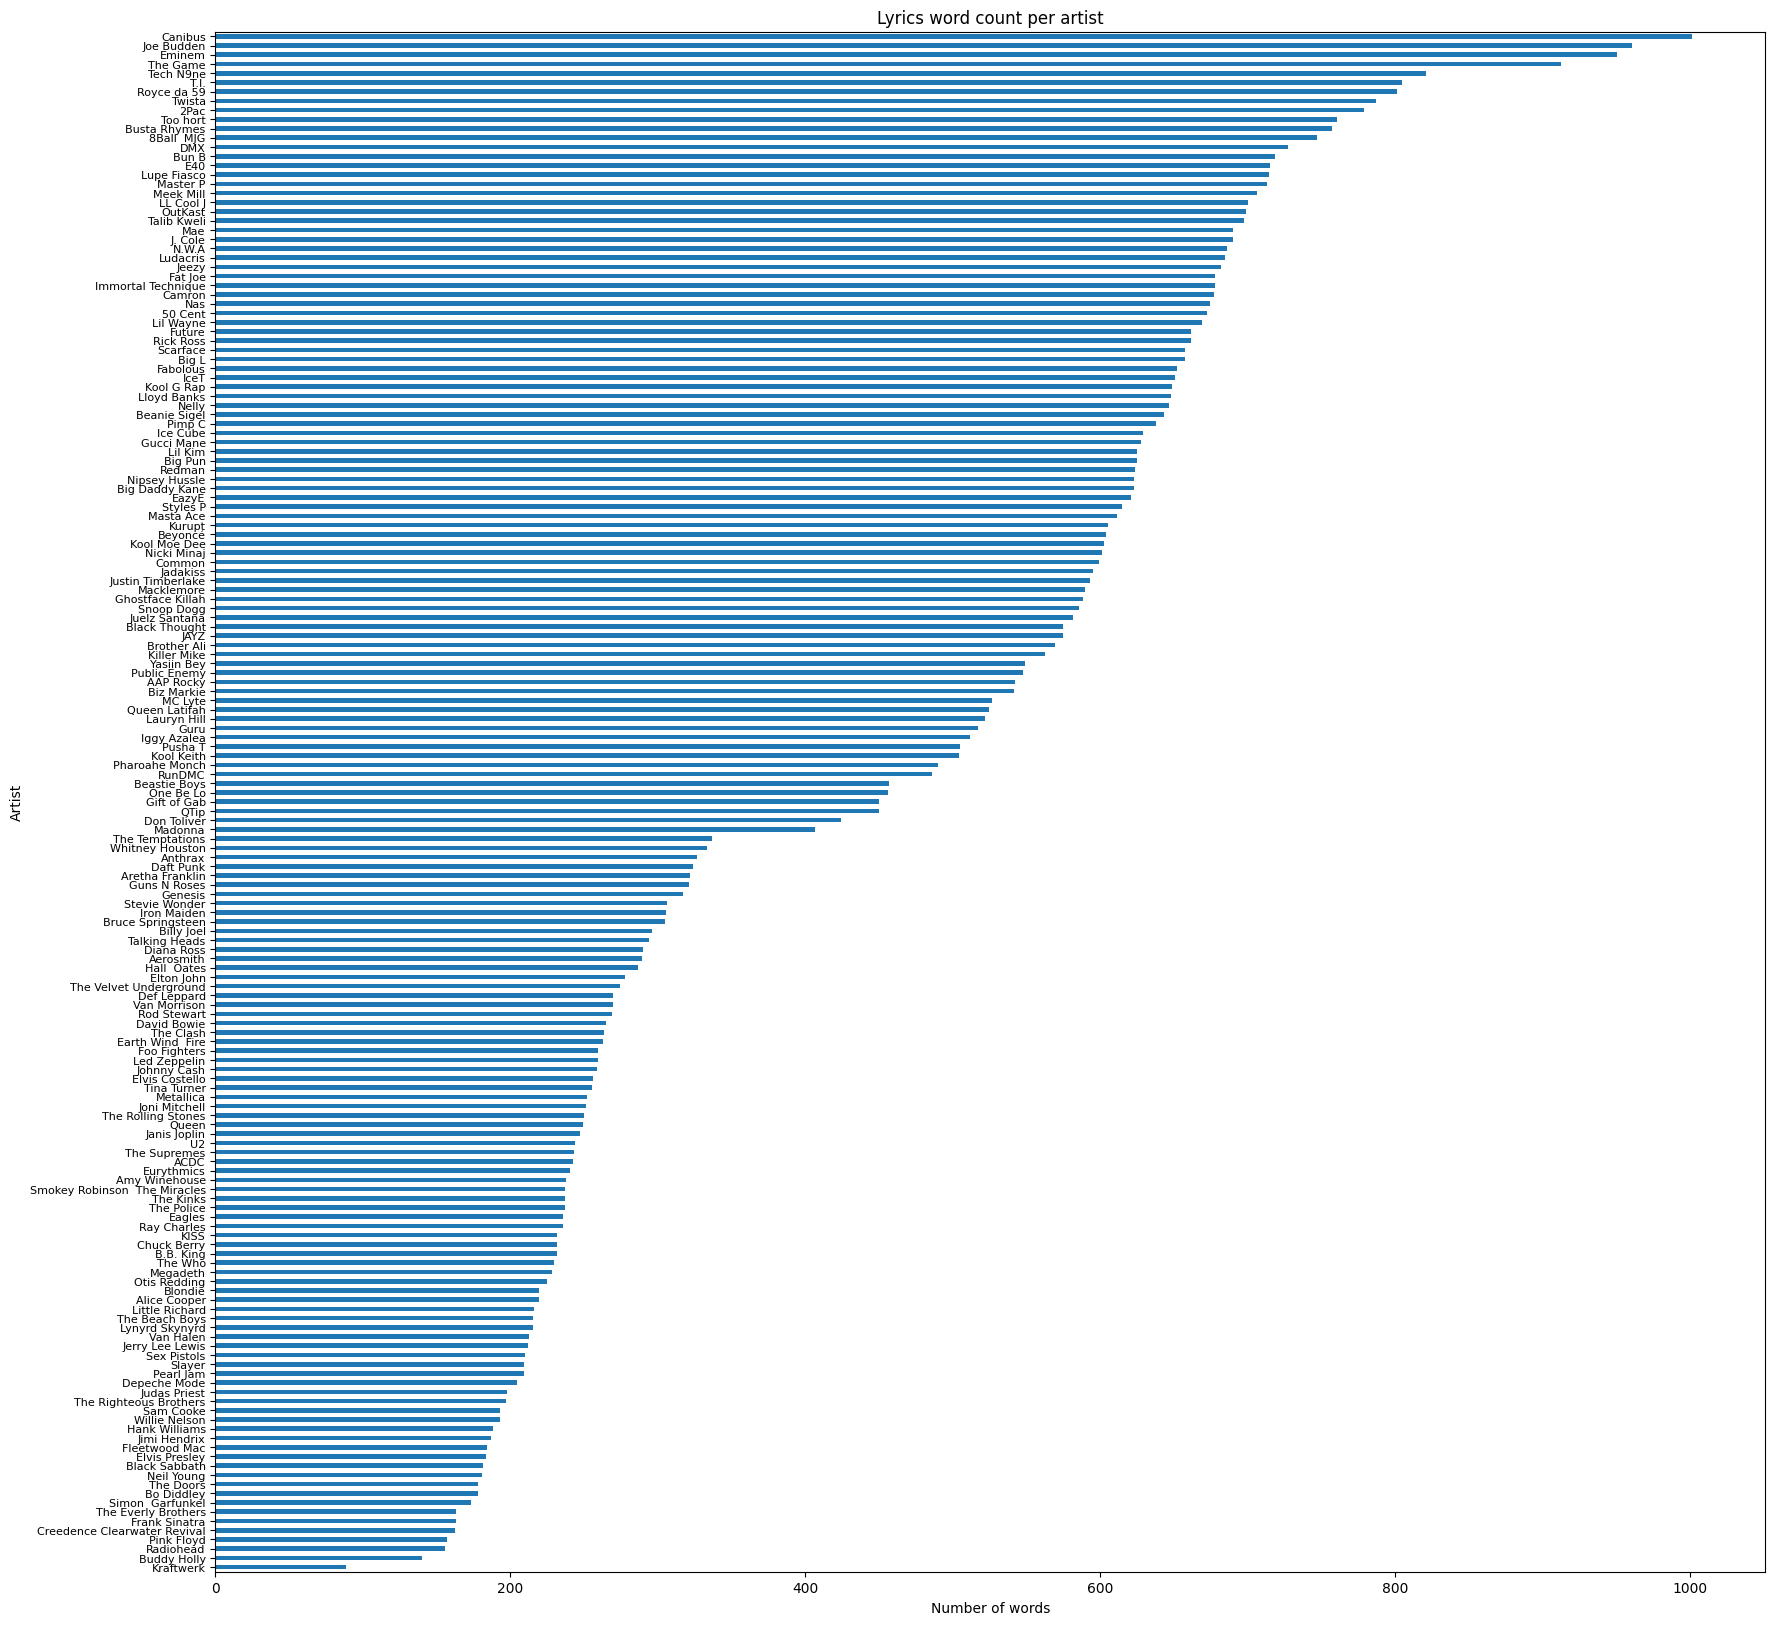

In [78]:
# plot lyrics word count per artist
df_songs.groupby('Artist').mean()['LyricsWordCount'].sort_values(ascending=True).plot(kind='barh', figsize=(20, 20))
plt.title('Lyrics word count per artist')
plt.xlabel('Number of words')
plt.ylabel('Artist')
plt.yticks(fontsize=8)

plt.show()

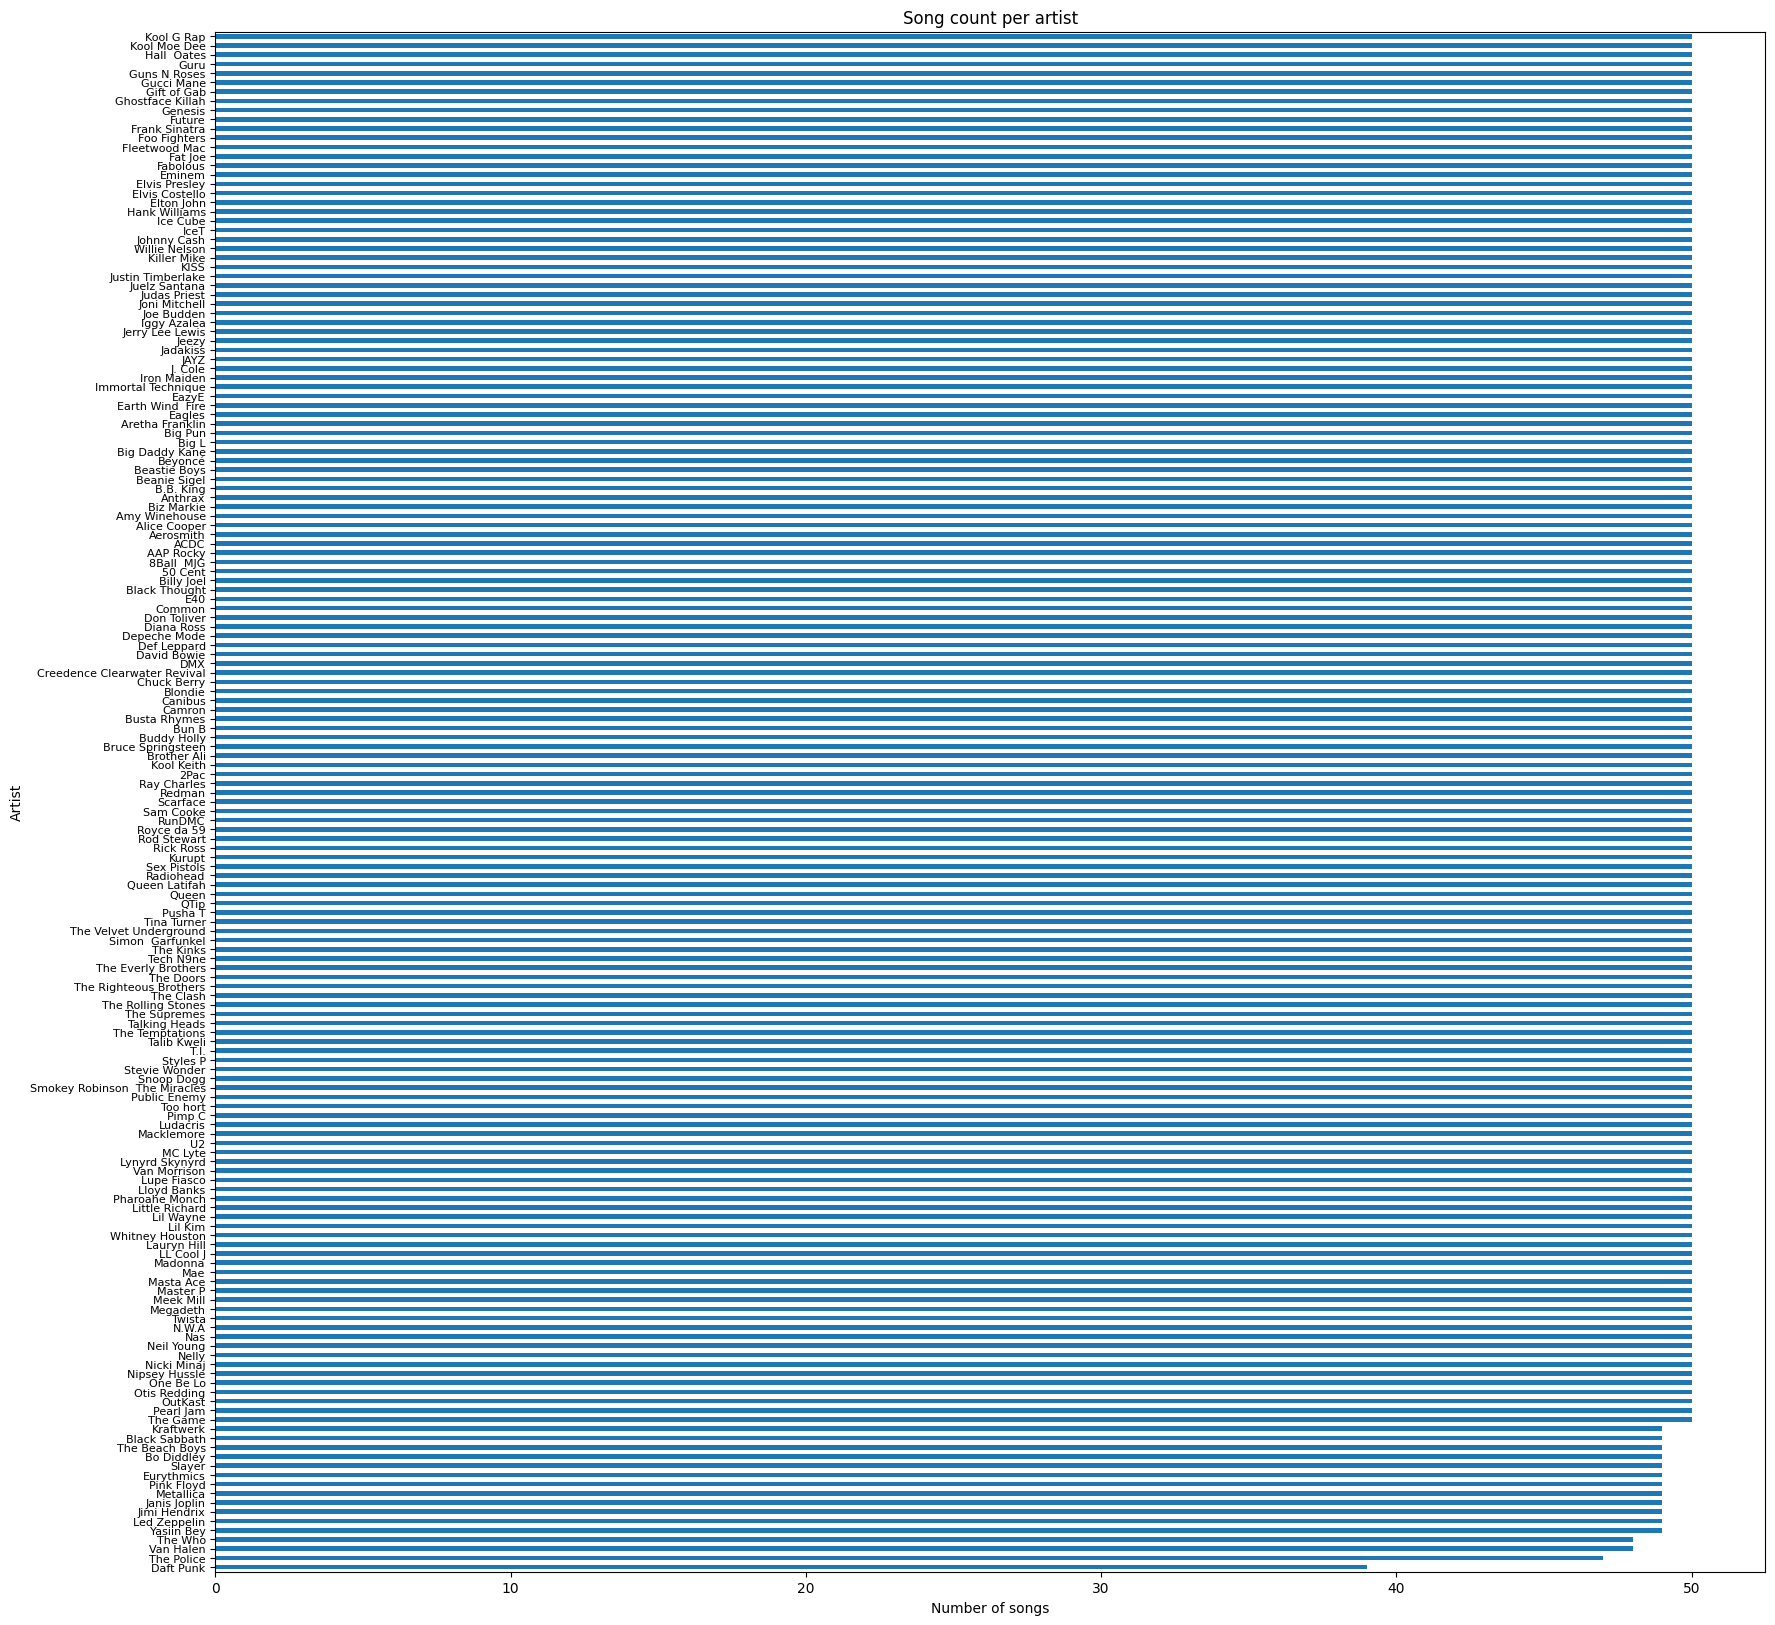

In [80]:
# plot song count per artist
df_songs.groupby('Artist').count()['Song'].sort_values(ascending=True).plot(kind='barh', figsize=(20, 20))
plt.title('Song count per artist')
plt.xlabel('Number of songs')
plt.ylabel('Artist')
plt.yticks(fontsize=8)
plt.show()

In [81]:
# drop all songs with less than 80 words
df_songs = df_songs[df_songs['LyricsWordCount'] >= 80]

df_songs.head()

,Artist,Song,Lyrics,LyricsWordCount
3120,Jerry Lee Lewis,Goodnight Irene,Last Saturday night I got married Me and my wi...,80
1540,Buddy Holly,Raining in My Heart,The sun is out The sky is blue Theres not a cl...,80
449,Kraftwerk,Europe Endless,Europe endless Endless endless endless endless...,80
2310,Whitney Houston,The Star Spangled Banner,Oh say can you see by the dawns early light Wh...,80
1449,Elvis Presley,Blue Moon,Blue moon You saw me standing alone Without a ...,81


In [82]:
# print number of lyrics per artist
df_songs.groupby('Artist').count()['Lyrics'].sort_values(ascending=True)

Artist
Kraftwerk            26
Daft Punk            33
Pink Floyd           36
The Who              44
Radiohead            45
                     ..
Killer Mike          50
DMX                  50
Justin Timberlake    50
Lil Wayne            50
Kool G Rap           50
Name: Lyrics, Length: 167, dtype: int64

In [83]:
# drop artists with less than 30 songs
for artist in df_songs['Artist'].unique():
    if len(df_songs[df_songs['Artist'] == artist]) < 30:
        df_songs = df_songs[df_songs['Artist'] != artist]

In [84]:
df_songs.head()

,Artist,Song,Lyrics,LyricsWordCount
3120,Jerry Lee Lewis,Goodnight Irene,Last Saturday night I got married Me and my wi...,80
1540,Buddy Holly,Raining in My Heart,The sun is out The sky is blue Theres not a cl...,80
2310,Whitney Houston,The Star Spangled Banner,Oh say can you see by the dawns early light Wh...,80
1449,Elvis Presley,Blue Moon,Blue moon You saw me standing alone Without a ...,81
642,Radiohead,The Tourist,It barks at no one else but me Like its seen a...,81


In [85]:
# print df-entry of longest song
df_songs[df_songs['LyricsWordCount'] == df_songs['LyricsWordCount'].max()]

,Artist,Song,Lyrics,LyricsWordCount
5885,Canibus,Poet Laureate Infinity,I got bored with 4 beats to the measure Profes...,9802


In [86]:
# print df-entry of shortest song
df_songs[df_songs['LyricsWordCount'] == df_songs['LyricsWordCount'].min()]

,Artist,Song,Lyrics,LyricsWordCount
3120,Jerry Lee Lewis,Goodnight Irene,Last Saturday night I got married Me and my wi...,80
1540,Buddy Holly,Raining in My Heart,The sun is out The sky is blue Theres not a cl...,80
2310,Whitney Houston,The Star Spangled Banner,Oh say can you see by the dawns early light Wh...,80


### Most used words

In [90]:
# get n most used words in lyrics from df
flat_list = [text for text in df_songs["Lyrics"].str.split() for text in text]
set_list = set(flat_list)

word_count = {word: 0 for word in set_list}
for word in flat_list:
  word_count[word] += 1

wordList = {k: v for k, v in sorted(word_count.items(), key=lambda item: item[1], reverse=True)}

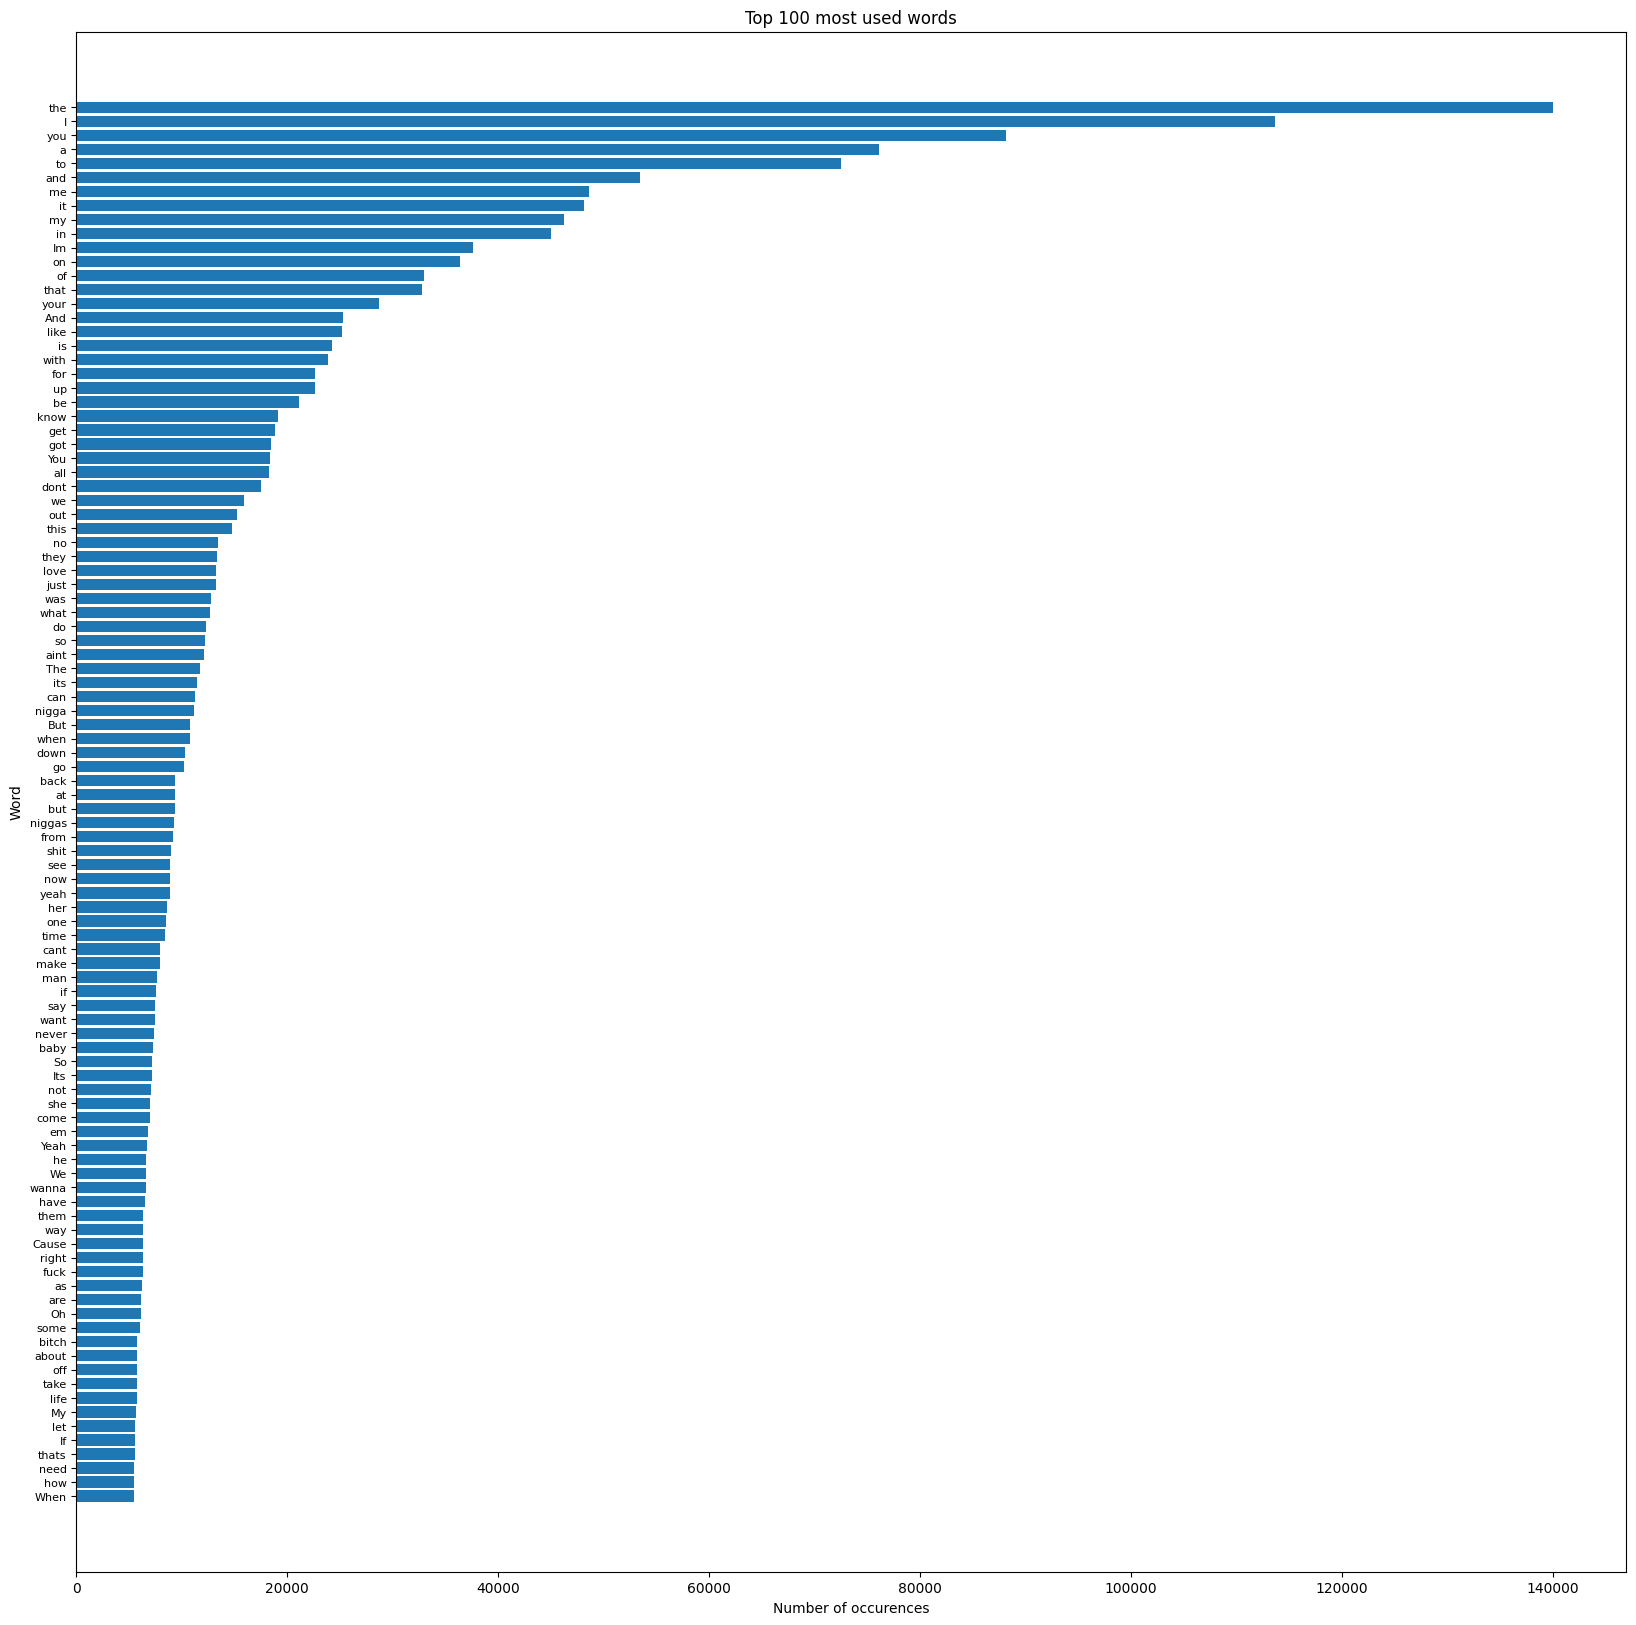

In [109]:
# plot top 100 of wordList vertically from most to least used
plt.figure(figsize=(20, 20))
plt.barh(list(wordList.keys())[:100], list(wordList.values())[:100])
plt.gca().invert_yaxis()
plt.title('Top 100 most used words')
plt.xlabel('Number of occurences')
plt.ylabel('Word')
plt.yticks(fontsize=8)
plt.show()



---

## Export as csv

In [52]:
exportPath = './datasets/df_songs.csv'

In [53]:
# export dataframe to csv to path
df_songs.to_csv(exportPath, index=False)